## Task 1

### method: LinearRegression().fit()



The given method basically finds the best value of the intercept and the slope of the line that best fits the given data. Below is a code snippet for the same.

```
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
```

*LinearRegression* fits a linear model with coefficients
$$\omega = ( \omega _{1},..., \omega _{p})$$
to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
Mathematically it solves a problem of the form:
$$ \underset{\omega}{\textrm{min}} = ||X - \omega y|| _{2} ^{2} $$

The *fit()* method takes in arrays X, and y and store the coefficients in its ```coef_``` member and the intercept in the ```intercept_``` member.

## Task 2

### Importing Data

In [1]:
import pickle

In [2]:
infile1 = open("train.pkl", 'rb')
train = pickle.load(infile1)
infile1.close()

In [3]:
infile2 = open("test.pkl", 'rb')
test_data = pickle.load(infile2)
infile2.close()

In [4]:
train

array([[  39.18236666, 4765.40421584],
       [  -7.08833508, 3782.0037892 ],
       [ -39.80170787,  743.90527908],
       ...,
       [  39.35145933, 2470.61226356],
       [  12.8210855 , 1806.34100101],
       [ -28.09216372,  -77.523256  ]])

In [5]:
test_data

array([[-2.14700000e+01, -5.02846044e+02],
       [-3.71100000e+01, -2.58147766e+03],
       [-6.40000000e+00, -1.28624000e+01],
       [ 3.61000000e+00,  3.05555205e+00],
       [ 2.57700000e+01,  8.43144144e+02],
       [-3.68500000e+01, -2.52776216e+03],
       [ 4.54200000e+01,  4.64430568e+03],
       [ 9.72000000e+00,  4.49297344e+01],
       [ 1.21600000e+01,  8.78233728e+01],
       [ 3.21500000e+01,  1.64155422e+03],
       [ 3.73700000e+01,  2.58208779e+03],
       [ 3.30200000e+01,  1.77898237e+03],
       [ 6.13000000e+00,  1.17044818e+01],
       [-8.12000000e+00, -2.70068544e+01],
       [-4.63000000e+01, -5.00405315e+03],
       [ 3.81000000e+00,  3.43689505e+00],
       [-2.39000000e+00,  2.27062050e-01],
       [-5.01000000e+00, -5.73947705e+00],
       [-4.98100000e+01, -6.22714303e+03],
       [-1.44000000e+00,  8.23628800e-01],
       [ 1.71000000e+00,  1.17442855e+00],
       [-3.26900000e+01, -1.76673153e+03],
       [ 3.87600000e+01,  2.88209592e+03],
       [-6.

In [6]:
import pandas as pd

In [7]:
train_df = pd.DataFrame(train, columns=["X","y"])
train_df

,X,y
0,39.182367,4765.404216
1,-7.088335,3782.003789
2,-39.801708,743.905279
3,-21.923343,5027.035592
4,4.096181,-4596.715255
...,...,...
7995,23.063270,-1486.452375
7996,29.566674,909.864473
7997,39.351459,2470.612264
7998,12.821086,1806.341001


In [8]:
test = pd.DataFrame(test_data, columns=["X","y"])
test

,X,y
0,-21.47,-502.846044
1,-37.11,-2581.477664
2,-6.40,-12.862400
3,3.61,3.055552
4,25.77,843.144144
...,...,...
75,32.03,1623.173603
76,8.45,29.655006
77,12.94,105.857737
78,-44.31,-4387.684172


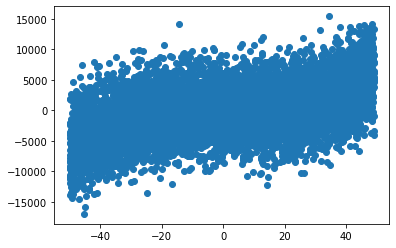

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(train_df.X, train_df.y)

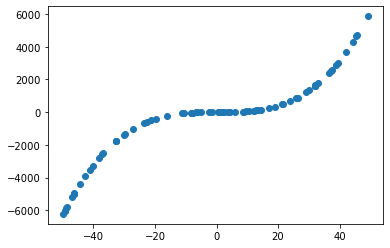

In [10]:
%matplotlib inline
plt.scatter(test.X, test.y)

### Splitting Data

In [11]:
# from sklearn.model_selection import train_test_split
import numpy as np 

In [12]:
# train,test=train_test_split(df,test_size=0.1,random_state=1)

In [13]:
# split the train set to 10 equal sets

# uncommnent this later:

train_dataset=np.split(train_df,10)
len(train_dataset)

10

## Polynomial Degree: 1

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
degree1bias = []
degree1variance = []

### Model 1

In [16]:
clf1 = LinearRegression()

In [17]:
clf1.fit(train_dataset[0][["X"]], train_dataset[0][["y"]])

LinearRegression()

In [18]:
predict = clf1.predict(test[["X"]])

In [19]:
clf1.score(test[["X"]],test[["y"]])

0.8379216315589443

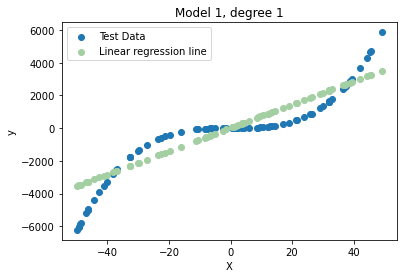

In [20]:
plt.title('Model 1, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [21]:
bias = (predict - test[["y"]]).y.mean(axis=0)
bias

283.75851445861144

In [22]:
# var = np.mean((np.square(predict))) - np.square(np.mean(predict))
# var = np.mean(np.square(predict - np.mean(predict)))
var = np.var(predict)
var

4408628.75292792

In [23]:
degree1bias.append(bias)
print(degree1bias)
degree1variance.append(var)
print(degree1variance)

[283.75851445861144]
[4408628.75292792]


### Model 2

In [24]:
clf2 = LinearRegression()

In [25]:
clf2.fit(train_dataset[1][["X"]], train_dataset[1][["y"]])

LinearRegression()

In [26]:
predict = clf2.predict(test[["X"]])

In [27]:
clf2.score(test[["X"]],test[["y"]])

0.8602338315816415

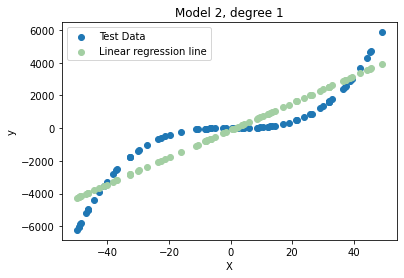

In [28]:
plt.title('Model 2, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [29]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584]
[4408628.75292792, 5949604.795132678]


### Model 3

In [30]:
clf3 = LinearRegression()

In [31]:
clf3.fit(train_dataset[2][["X"]], train_dataset[2][["y"]])

LinearRegression()

In [32]:
predict = clf3.predict(test[["X"]])

In [33]:
clf3.score(test[["X"]],test[["y"]])

0.839507916681895

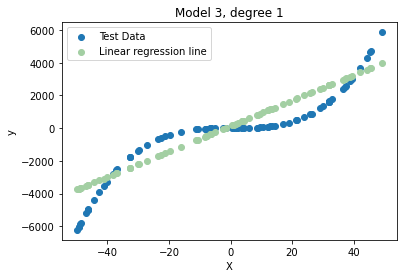

In [34]:
plt.title('Model 3, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [35]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087]
[4408628.75292792, 5949604.795132678, 5288474.208324394]


### Model 4

In [36]:
clf4 = LinearRegression()

In [37]:
clf4.fit(train_dataset[3][["X"]], train_dataset[3][["y"]])

LinearRegression()

In [38]:
predict = clf4.predict(test[["X"]])

In [39]:
clf4.score(test[["X"]],test[["y"]])

0.8470765739385476

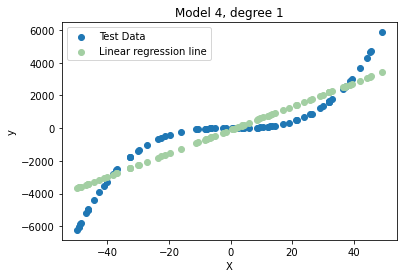

In [40]:
plt.title('Model 4, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [41]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087, 158.2903777045616]
[4408628.75292792, 5949604.795132678, 5288474.208324394, 4446122.727622731]


### Model 5

In [42]:
clf5 = LinearRegression()

In [43]:
clf5.fit(train_dataset[4][["X"]], train_dataset[4][["y"]])

LinearRegression()

In [44]:
predict = clf5.predict(test[["X"]])

In [45]:
clf5.score(test[["X"]],test[["y"]])

0.8414397122975019

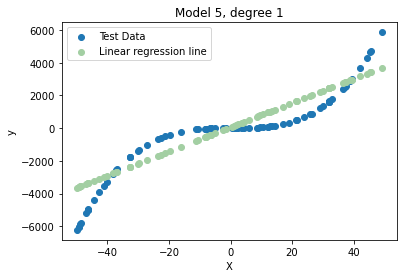

In [46]:
plt.title('Model 5, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [47]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087, 158.2903777045616, 314.99376980884296]
[4408628.75292792, 5949604.795132678, 5288474.208324394, 4446122.727622731, 4774318.05616947]


### Model 6

In [48]:
clf6 = LinearRegression()

In [49]:
clf6.fit(train_dataset[5][["X"]], train_dataset[5][["y"]])

LinearRegression()

In [50]:
predict = clf6.predict(test[["X"]])

In [51]:
clf6.score(test[["X"]],test[["y"]])

0.8324647986729733

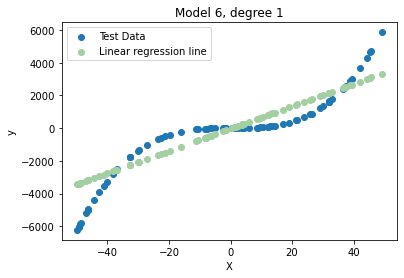

In [52]:
plt.title('Model 6, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [53]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087, 158.2903777045616, 314.99376980884296, 244.6125415243577]
[4408628.75292792, 5949604.795132678, 5288474.208324394, 4446122.727622731, 4774318.05616947, 4056267.9354747147]


### Model 7

In [54]:
clf7 = LinearRegression()

In [55]:
clf7.fit(train_dataset[6][["X"]], train_dataset[6][["y"]])

LinearRegression()

In [56]:
predict = clf7.predict(test[["X"]])

In [57]:
clf7.score(test[["X"]],test[["y"]])

0.8615281068917898

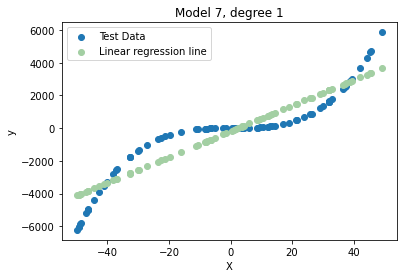

In [58]:
plt.title('Model 7, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [59]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087, 158.2903777045616, 314.99376980884296, 244.6125415243577, 51.67613383573723]
[4408628.75292792, 5949604.795132678, 5288474.208324394, 4446122.727622731, 4774318.05616947, 4056267.9354747147, 5370194.678405515]


### Model 8

In [60]:
clf8 = LinearRegression()

In [61]:
clf8.fit(train_dataset[7][["X"]], train_dataset[7][["y"]])

LinearRegression()

In [62]:
predict = clf8.predict(test[["X"]])

In [63]:
clf8.score(test[["X"]],test[["y"]])

0.8535402339508228

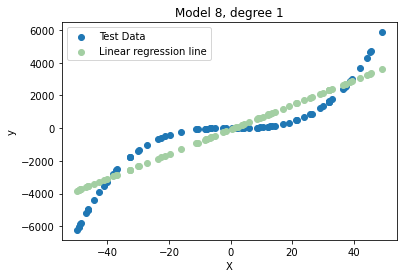

In [64]:
plt.title('Model 8, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [65]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087, 158.2903777045616, 314.99376980884296, 244.6125415243577, 51.67613383573723, 172.32634609611162]
[4408628.75292792, 5949604.795132678, 5288474.208324394, 4446122.727622731, 4774318.05616947, 4056267.9354747147, 5370194.678405515, 4895961.914468985]


### Model 9

In [66]:
clf9 = LinearRegression()

In [67]:
clf9.fit(train_dataset[8][["X"]], train_dataset[8][["y"]])

LinearRegression()

In [68]:
predict = clf9.predict(test[["X"]])

In [69]:
clf9.score(test[["X"]],test[["y"]])

0.832640342413919

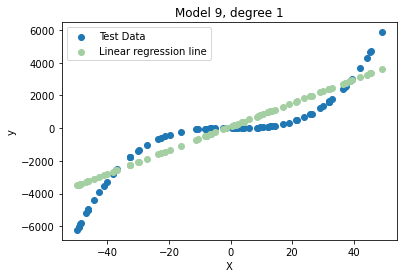

In [70]:
plt.title('Model 9, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [71]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087, 158.2903777045616, 314.99376980884296, 244.6125415243577, 51.67613383573723, 172.32634609611162, 356.6769688774557]
[4408628.75292792, 5949604.795132678, 5288474.208324394, 4446122.727622731, 4774318.05616947, 4056267.9354747147, 5370194.678405515, 4895961.914468985, 4498116.711822818]


### Model 10

In [72]:
clf10 = LinearRegression()

In [73]:
clf10.fit(train_dataset[9][["X"]], train_dataset[9][["y"]])

LinearRegression()

In [74]:
predict = clf10.predict(test[["X"]])

In [75]:
clf10.score(test[["X"]],test[["y"]])

0.839172979971915

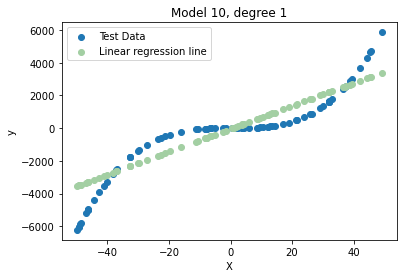

In [76]:
plt.title('Model 10, degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Linear regression line')
plt.legend(loc="upper left")
plt.show()

In [77]:
degree1bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree1bias)
degree1variance.append(np.mean((np.square(predict))) - np.square(np.mean(predict)))
print(degree1variance)

[283.75851445861144, 116.77981031374584, 381.3515225353087, 158.2903777045616, 314.99376980884296, 244.6125415243577, 51.67613383573723, 172.32634609611162, 356.6769688774557, 221.9961327473652]
[4408628.75292792, 5949604.795132678, 5288474.208324394, 4446122.727622731, 4774318.05616947, 4056267.9354747147, 5370194.678405515, 4895961.914468985, 4498116.711822818, 4253063.165787983]


## Analysis

In [78]:
mean_variance = np.mean(degree1variance)
mean_bias = np.mean(degree1bias)
print("Mean variance for degree 1 function: ", mean_variance)
print("Mean bias for degree 1 function: ", mean_bias)

Mean variance for degree 1 function:  4794075.294613721
Mean bias for degree 1 function:  230.24621179020977


## Polynomial Degree: 2

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
degree2bias = []
degree2variance = []

### Model 1

In [81]:
poly2_1 = PolynomialFeatures(degree=2)
x_poly2_1 = poly2_1.fit_transform(train_dataset[0][["X"]])
poly2_1.fit(train_dataset[0][["X"]],train_dataset[0][["y"]])

PolynomialFeatures()

In [82]:
clf2_1=LinearRegression()
clf2_1.fit(x_poly2_1,train_dataset[0][["y"]])

LinearRegression()

In [83]:
predict=clf2_1.predict(poly2_1.fit_transform(test[["X"]]))

In [84]:
clf2_1.score(poly2_1.fit_transform(test[["X"]]),test[["y"]])

0.852315055743856

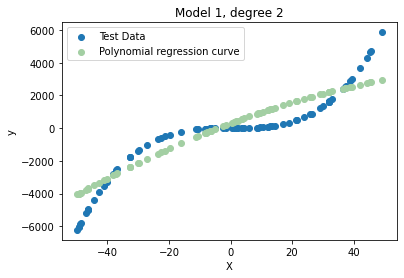

In [85]:
plt.title('Model 1, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [86]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036]
[4683606.656506397]


### Model 2

In [87]:
poly2_2 = PolynomialFeatures(degree=2)
x_poly2_2 = poly2_2.fit_transform(train_dataset[1][["X"]])
poly2_2.fit(train_dataset[1][["X"]],train_dataset[1][["y"]])

PolynomialFeatures()

In [88]:
clf2_2=LinearRegression()
clf2_2.fit(x_poly2_2,train_dataset[1][["y"]])

LinearRegression()

In [89]:
predict=clf2_2.predict(poly2_2.fit_transform(test[["X"]]))

In [90]:
clf2_2.score(poly2_2.fit_transform(test[["X"]]),test[["y"]])

0.8673724384333316

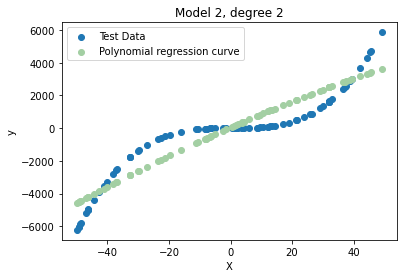

In [91]:
plt.title('Model 2, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [92]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557]
[4683606.656506397, 6172552.36903442]


### Model 3

In [93]:
poly2_3 = PolynomialFeatures(degree=2)
x_poly2_3 = poly2_3.fit_transform(train_dataset[2][["X"]])
poly2_3.fit(train_dataset[2][["X"]],train_dataset[2][["y"]])

PolynomialFeatures()

In [94]:
clf2_3=LinearRegression()
clf2_3.fit(x_poly2_3,train_dataset[2][["y"]])

LinearRegression()

In [95]:
predict=clf2_3.predict(poly2_3.fit_transform(test[["X"]]))

In [96]:
clf2_3.score(poly2_3.fit_transform(test[["X"]]),test[["y"]])

0.8259125736419142

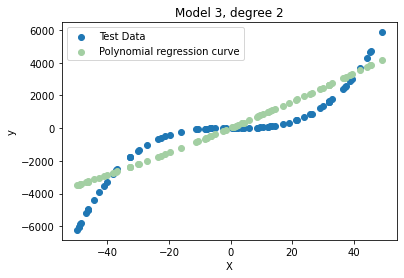

In [97]:
plt.title('Model 3, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [98]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763]
[4683606.656506397, 6172552.36903442, 5126648.919952233]


### Model 4

In [99]:
poly2_4 = PolynomialFeatures(degree=2)
x_poly2_4 = poly2_4.fit_transform(train_dataset[3][["X"]])
poly2_4.fit(train_dataset[3][["X"]],train_dataset[3][["y"]])

PolynomialFeatures()

In [100]:
clf2_4=LinearRegression()
clf2_4.fit(x_poly2_4,train_dataset[3][["y"]])

LinearRegression()

In [101]:
predict=clf2_4.predict(poly2_4.fit_transform(test[["X"]]))

In [102]:
clf2_4.score(poly2_4.fit_transform(test[["X"]]),test[["y"]])

0.855134631338777

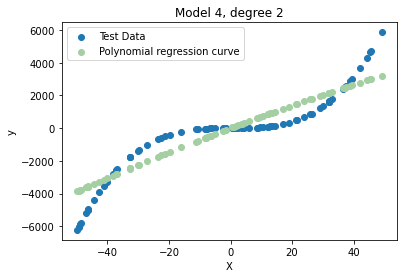

In [103]:
plt.title('Model 4, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [104]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763, 159.99046841914839]
[4683606.656506397, 6172552.36903442, 5126648.919952233, 4565869.719876951]


### Model 5

In [105]:
poly2_5 = PolynomialFeatures(degree=2)
x_poly2_5 = poly2_5.fit_transform(train_dataset[4][["X"]])
poly2_5.fit(train_dataset[4][["X"]],train_dataset[4][["y"]])

PolynomialFeatures()

In [106]:
clf2_5=LinearRegression()
clf2_5.fit(x_poly2_5,train_dataset[4][["y"]])

LinearRegression()

In [107]:
predict=clf2_5.predict(poly2_5.fit_transform(test[["X"]]))

In [108]:
clf2_5.score(poly2_5.fit_transform(test[["X"]]),test[["y"]])

0.848056104017214

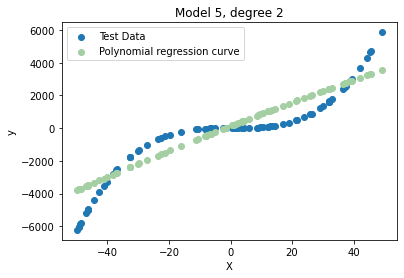

In [109]:
plt.title('Model 5, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [110]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763, 159.99046841914839, 308.2984444733343]
[4683606.656506397, 6172552.36903442, 5126648.919952233, 4565869.719876951, 4871837.554750705]


### Model 6

In [111]:
poly2_6 = PolynomialFeatures(degree=2)
x_poly2_6 = poly2_6.fit_transform(train_dataset[5][["X"]])
poly2_6.fit(train_dataset[5][["X"]],train_dataset[5][["y"]])

PolynomialFeatures()

In [112]:
clf2_6=LinearRegression()
clf2_6.fit(x_poly2_6,train_dataset[5][["y"]])

LinearRegression()

In [113]:
predict=clf2_6.predict(poly2_6.fit_transform(test[["X"]]))

In [114]:
clf2_6.score(poly2_6.fit_transform(test[["X"]]),test[["y"]])

0.8466563664238802

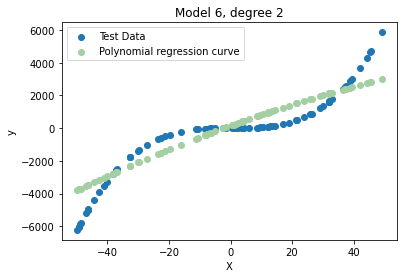

In [115]:
plt.title('Model 6, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [116]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763, 159.99046841914839, 308.2984444733343, 232.75140447739824]
[4683606.656506397, 6172552.36903442, 5126648.919952233, 4565869.719876951, 4871837.554750705, 4276169.689931037]


### Model 7

In [117]:
poly2_7 = PolynomialFeatures(degree=2)
x_poly2_7 = poly2_7.fit_transform(train_dataset[6][["X"]])
poly2_7.fit(train_dataset[6][["X"]],train_dataset[6][["y"]])

PolynomialFeatures()

In [118]:
clf2_7=LinearRegression()
clf2_7.fit(x_poly2_7,train_dataset[6][["y"]])

LinearRegression()

In [119]:
predict=clf2_7.predict(poly2_7.fit_transform(test[["X"]]))

In [120]:
clf2_7.score(poly2_7.fit_transform(test[["X"]]),test[["y"]])

0.863915518523806

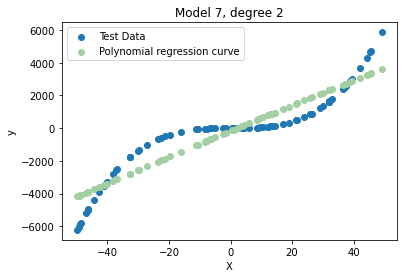

In [121]:
plt.title('Model 7, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [122]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763, 159.99046841914839, 308.2984444733343, 232.75140447739824, 49.71140141068238]
[4683606.656506397, 6172552.36903442, 5126648.919952233, 4565869.719876951, 4871837.554750705, 4276169.689931037, 5413568.9174210075]


### Model 8

In [123]:
poly2_8 = PolynomialFeatures(degree=2)
x_poly2_8 = poly2_8.fit_transform(train_dataset[7][["X"]])
poly2_8.fit(train_dataset[7][["X"]],train_dataset[7][["y"]])

PolynomialFeatures()

In [124]:
clf2_8=LinearRegression()
clf2_8.fit(x_poly2_8,train_dataset[7][["y"]])

LinearRegression()

In [125]:
predict=clf2_8.predict(poly2_8.fit_transform(test[["X"]]))

In [126]:
clf2_8.score(poly2_8.fit_transform(test[["X"]]),test[["y"]])

0.8652593184340815

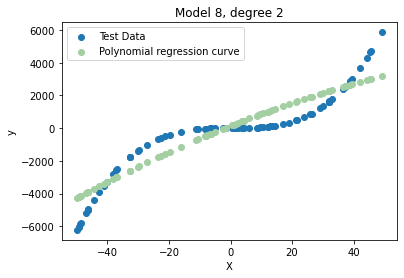

In [127]:
plt.title('Model 8, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [128]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763, 159.99046841914839, 308.2984444733343, 232.75140447739824, 49.71140141068238, 164.48105756111468]
[4683606.656506397, 6172552.36903442, 5126648.919952233, 4565869.719876951, 4871837.554750705, 4276169.689931037, 5413568.9174210075, 5165483.4642709335]


### Model 9

In [129]:
poly2_9 = PolynomialFeatures(degree=2)
x_poly2_9 = poly2_9.fit_transform(train_dataset[8][["X"]])
poly2_9.fit(train_dataset[8][["X"]],train_dataset[8][["y"]])

PolynomialFeatures()

In [130]:
clf2_9=LinearRegression()
clf2_9.fit(x_poly2_9,train_dataset[8][["y"]])

LinearRegression()

In [131]:
predict=clf2_9.predict(poly2_9.fit_transform(test[["X"]]))

In [132]:
clf2_9.score(poly2_9.fit_transform(test[["X"]]),test[["y"]])

0.8236904894013094

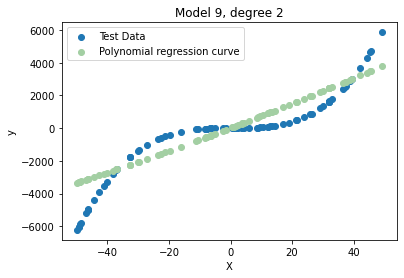

In [133]:
plt.title('Model 9, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [134]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763, 159.99046841914839, 308.2984444733343, 232.75140447739824, 49.71140141068238, 164.48105756111468, 363.39905178666993]
[4683606.656506397, 6172552.36903442, 5126648.919952233, 4565869.719876951, 4871837.554750705, 4276169.689931037, 5413568.9174210075, 5165483.4642709335, 4440156.498025022]


### Model 10

In [135]:
poly2_10 = PolynomialFeatures(degree=2)
x_poly2_10 = poly2_10.fit_transform(train_dataset[9][["X"]])
poly2_10.fit(train_dataset[9][["X"]],train_dataset[9][["y"]])

PolynomialFeatures()

In [136]:
clf2_10=LinearRegression()
clf2_10.fit(x_poly2_10,train_dataset[9][["y"]])

LinearRegression()

In [137]:
predict=clf2_10.predict(poly2_10.fit_transform(test[["X"]]))

In [138]:
clf2_10.score(poly2_10.fit_transform(test[["X"]]),test[["y"]])

0.8497608895395513

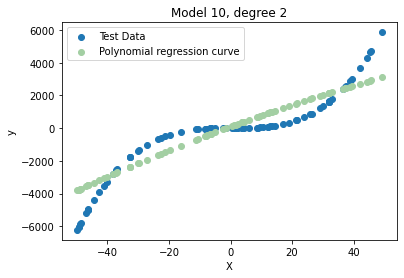

In [139]:
plt.title('Model 10, degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(test[["X"]], test[["y"]], label='Test Data')
plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
plt.legend(loc="upper left")
plt.show()

In [140]:
degree2bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree2bias)
degree2variance.append(np.var(predict))
print(degree2variance)

[266.79049662056036, 113.52433632051557, 390.61411472597763, 159.99046841914839, 308.2984444733343, 232.75140447739824, 49.71140141068238, 164.48105756111468, 363.39905178666993, 215.60431419466408]
[4683606.656506397, 6172552.36903442, 5126648.919952233, 4565869.719876951, 4871837.554750705, 4276169.689931037, 5413568.9174210075, 5165483.4642709335, 4440156.498025022, 4395207.097609551]


## Analysis

In [141]:
mean_variance = np.mean(degree2variance)
mean_bias = np.mean(degree2bias)
print("Mean variance for degree 2 function: ", mean_variance)
print("Mean bias for degree 2 function: ", mean_bias)

Mean variance for degree 2 function:  4911110.088737825
Mean bias for degree 2 function:  226.5165089990066


## Polynomial Degree: 3

In [142]:
def higherdegreemodel(d, dataset_X, dataset_y) :
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(dataset_X)
    poly.fit(dataset_X,dataset_y)
    clf=LinearRegression()
    clf.fit(x_poly,dataset_y)
    predict=clf.predict(poly.fit_transform(test[["X"]]))
    print("Coefficient of determination (R**2): ", clf.score(poly.fit_transform(test[["X"]]),test[["y"]]))
    return predict

In [143]:
def plot(title, predict) :
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.scatter(test[["X"]], test[["y"]], label='Test Data')
    plt.scatter(test[["X"]], predict, c='#a3cfa3', label='Polynomial regression curve')
    plt.legend(loc="upper left")
    plt.show()

In [144]:
degree3bias = []
degree3variance = []

### Model 1

In [145]:
predict = higherdegreemodel(3, train_dataset[0][["X"]], train_dataset[0][["y"]])

Coefficient of determination (R**2):  0.9895332115801655


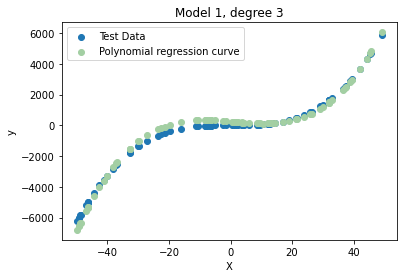

In [146]:
plot("Model 1, degree 3", predict)

In [147]:
degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

[50.97987551380545]
[7193396.87318546]


### Model 2

In [148]:
predict = higherdegreemodel(3, train_dataset[1][["X"]], train_dataset[1][["y"]])

Coefficient of determination (R**2):  0.9773946844525322


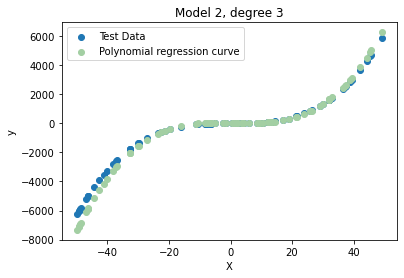

In [149]:
plot("Model 2, degree 3", predict)

In [150]:
degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

[50.97987551380545, -142.7175500832991]
[7193396.87318546, 8464176.300567916]


### Model 3

Coefficient of determination (R**2):  0.9915239557606451


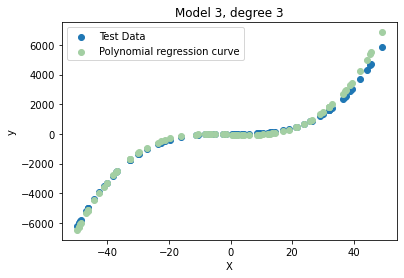

[50.97987551380545, -142.7175500832991, 58.050719994847825]
[7193396.87318546, 8464176.300567916, 7575864.882830414]


In [151]:
predict = higherdegreemodel(3, train_dataset[2][["X"]], train_dataset[2][["y"]])

plot("Model 3, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

### Model 4

Coefficient of determination (R**2):  0.9849898774279838


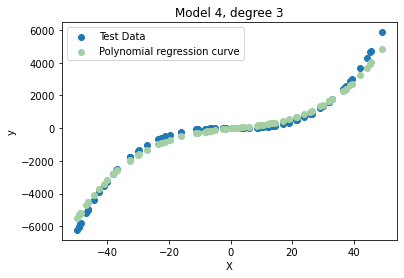

[50.97987551380545, -142.7175500832991, 58.050719994847825, 0.9234741020957852]
[7193396.87318546, 8464176.300567916, 7575864.882830414, 5507536.711567693]


In [152]:
predict = higherdegreemodel(3, train_dataset[3][["X"]], train_dataset[3][["y"]])

plot("Model 4, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

### Model 5

Coefficient of determination (R**2):  0.9963015052878403


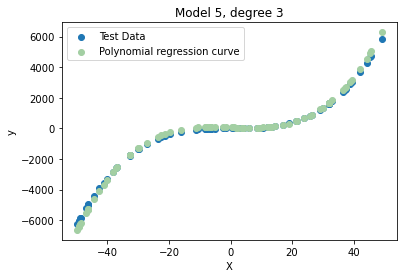

[50.97987551380545, -142.7175500832991, 58.050719994847825, 0.9234741020957852, 16.061943583981552]
[7193396.87318546, 8464176.300567916, 7575864.882830414, 5507536.711567693, 7342891.387290786]


In [153]:
predict = higherdegreemodel(3, train_dataset[4][["X"]], train_dataset[4][["y"]])

plot("Model 5, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

### Model 6

Coefficient of determination (R**2):  0.9874974562450484


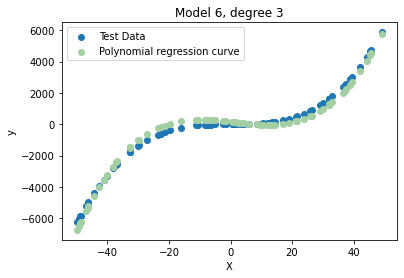

[50.97987551380545, -142.7175500832991, 58.050719994847825, 0.9234741020957852, 16.061943583981552, -43.086202973618995]
[7193396.87318546, 8464176.300567916, 7575864.882830414, 5507536.711567693, 7342891.387290786, 6666482.442255769]


In [154]:
predict = higherdegreemodel(3, train_dataset[5][["X"]], train_dataset[5][["y"]])

plot("Model 6, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

### Model 7

Coefficient of determination (R**2):  0.9893191082216246


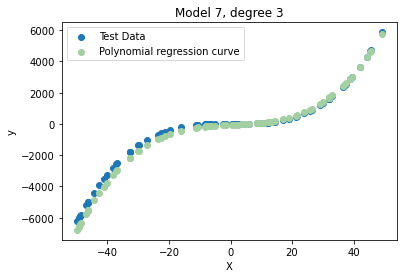

[50.97987551380545, -142.7175500832991, 58.050719994847825, 0.9234741020957852, 16.061943583981552, -43.086202973618995, -157.06601131671968]
[7193396.87318546, 8464176.300567916, 7575864.882830414, 5507536.711567693, 7342891.387290786, 6666482.442255769, 7589754.907146324]


In [155]:
predict = higherdegreemodel(3, train_dataset[6][["X"]], train_dataset[6][["y"]])

plot("Model 7, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

### Model 8

Coefficient of determination (R**2):  0.9956904055297952


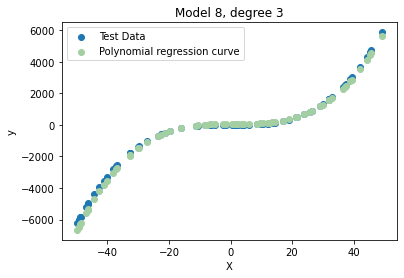

[50.97987551380545, -142.7175500832991, 58.050719994847825, 0.9234741020957852, 16.061943583981552, -43.086202973618995, -157.06601131671968, -86.68649223628003]
[7193396.87318546, 8464176.300567916, 7575864.882830414, 5507536.711567693, 7342891.387290786, 6666482.442255769, 7589754.907146324, 7062521.789673507]


In [156]:
predict = higherdegreemodel(3, train_dataset[7][["X"]], train_dataset[7][["y"]])

plot("Model 8, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

### Model 9

Coefficient of determination (R**2):  0.9909924239295399


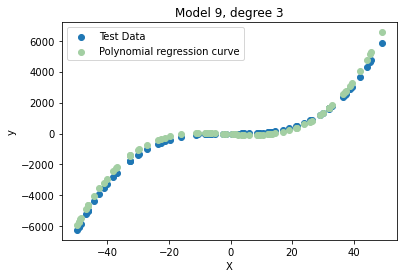

[50.97987551380545, -142.7175500832991, 58.050719994847825, 0.9234741020957852, 16.061943583981552, -43.086202973618995, -157.06601131671968, -86.68649223628003, 131.231727971939]
[7193396.87318546, 8464176.300567916, 7575864.882830414, 5507536.711567693, 7342891.387290786, 6666482.442255769, 7589754.907146324, 7062521.789673507, 6374638.430617773]


In [157]:
predict = higherdegreemodel(3, train_dataset[8][["X"]], train_dataset[8][["y"]])

plot("Model 9, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

### Model 10

Coefficient of determination (R**2):  0.9974864152520797


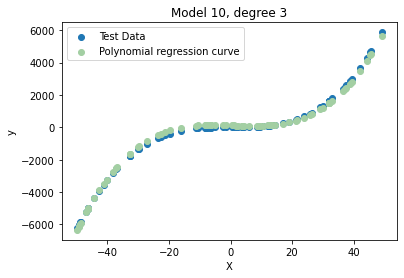

[50.97987551380545, -142.7175500832991, 58.050719994847825, 0.9234741020957852, 16.061943583981552, -43.086202973618995, -157.06601131671968, -86.68649223628003, 131.231727971939, 16.74758667756589]
[7193396.87318546, 8464176.300567916, 7575864.882830414, 5507536.711567693, 7342891.387290786, 6666482.442255769, 7589754.907146324, 7062521.789673507, 6374638.430617773, 6441401.5646186005]


In [158]:
predict = higherdegreemodel(3, train_dataset[9][["X"]], train_dataset[9][["y"]])

plot("Model 10, degree 3", predict)

degree3bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree3bias)
degree3variance.append(np.var(predict))
print(degree3variance)

## Analysis

In [159]:
mean_variance = np.mean(degree3variance)
mean_bias = np.mean(degree3bias)
print("Mean variance for degree 3 function: ", mean_variance)
print("Mean bias for degree 3 function: ", mean_bias)

Mean variance for degree 3 function:  7021866.528975424
Mean bias for degree 3 function:  -15.556092876568233


## Polynomial Degree: 4

In [160]:
degree4bias = []
degree4variance = []

### Model 1

Coefficient of determination (R**2):  0.9896705279478422


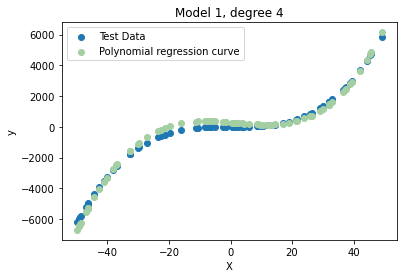

[58.571953172803]
[7141981.557670614]


In [161]:
predict = higherdegreemodel(4, train_dataset[0][["X"]], train_dataset[0][["y"]])

plot("Model 1, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 2

Coefficient of determination (R**2):  0.9765787512611674


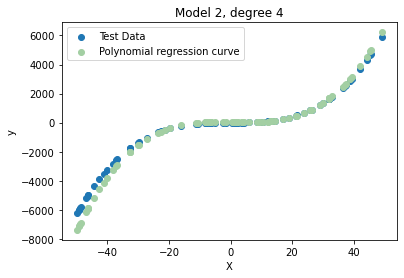

[58.571953172803, -146.44184524048845]
[7141981.557670614, 8498447.21398446]


In [162]:
predict = higherdegreemodel(4, train_dataset[1][["X"]], train_dataset[1][["y"]])

plot("Model 2, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 3

Coefficient of determination (R**2):  0.9904594814961124


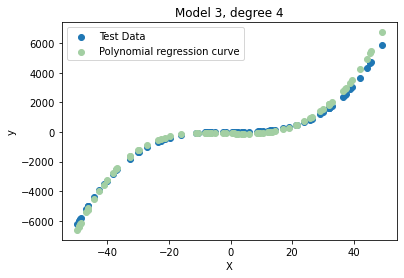

[58.571953172803, -146.44184524048845, 47.67699387148931]
[7141981.557670614, 8498447.21398446, 7673622.928177153]


In [163]:
predict = higherdegreemodel(4, train_dataset[2][["X"]], train_dataset[2][["y"]])

plot("Model 3, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 4

Coefficient of determination (R**2):  0.9704803566170908


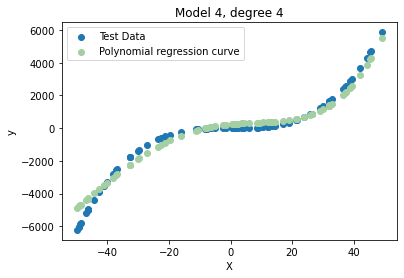

[58.571953172803, -146.44184524048845, 47.67699387148931, 52.392654834286624]
[7141981.557670614, 8498447.21398446, 7673622.928177153, 5276153.633059924]


In [164]:
predict = higherdegreemodel(4, train_dataset[3][["X"]], train_dataset[3][["y"]])

plot("Model 4, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 5

Coefficient of determination (R**2):  0.9740285715112724


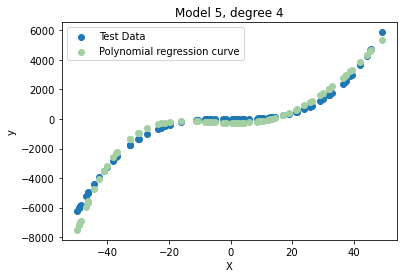

[58.571953172803, -146.44184524048845, 47.67699387148931, 52.392654834286624, -54.25488702182544]
[7141981.557670614, 8498447.21398446, 7673622.928177153, 5276153.633059924, 7998354.593784353]


In [165]:
predict = higherdegreemodel(4, train_dataset[4][["X"]], train_dataset[4][["y"]])

plot("Model 5, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 6

Coefficient of determination (R**2):  0.9872147949594007


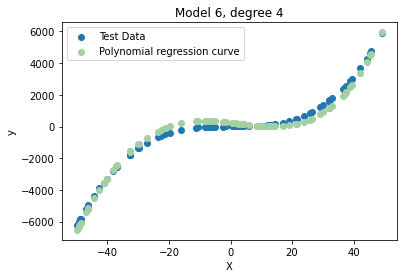

[58.571953172803, -146.44184524048845, 47.67699387148931, 52.392654834286624, -54.25488702182544, -29.475395388040255]
[7141981.557670614, 8498447.21398446, 7673622.928177153, 5276153.633059924, 7998354.593784353, 6536942.077269065]


In [166]:
predict = higherdegreemodel(4, train_dataset[5][["X"]], train_dataset[5][["y"]])

plot("Model 6, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 7

Coefficient of determination (R**2):  0.9588097079604118


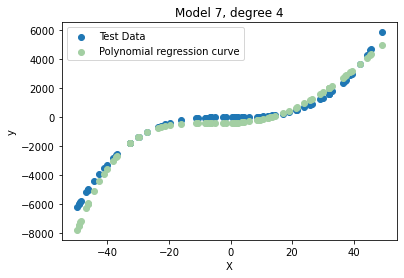

[58.571953172803, -146.44184524048845, 47.67699387148931, 52.392654834286624, -54.25488702182544, -29.475395388040255, -242.69071912374503]
[7141981.557670614, 8498447.21398446, 7673622.928177153, 5276153.633059924, 7998354.593784353, 6536942.077269065, 8433517.279647887]


In [167]:
predict = higherdegreemodel(4, train_dataset[6][["X"]], train_dataset[6][["y"]])

plot("Model 7, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 8

Coefficient of determination (R**2):  0.9906995675211142


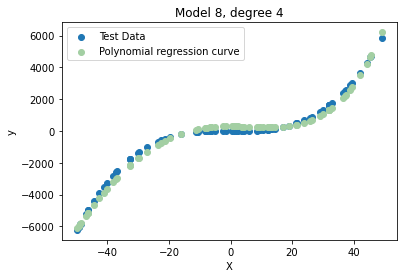

[58.571953172803, -146.44184524048845, 47.67699387148931, 52.392654834286624, -54.25488702182544, -29.475395388040255, -242.69071912374503, -43.19175548093205]
[7141981.557670614, 8498447.21398446, 7673622.928177153, 5276153.633059924, 7998354.593784353, 6536942.077269065, 8433517.279647887, 6803290.158822345]


In [168]:
predict = higherdegreemodel(4, train_dataset[7][["X"]], train_dataset[7][["y"]])

plot("Model 8, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 9

Coefficient of determination (R**2):  0.9883594912359268


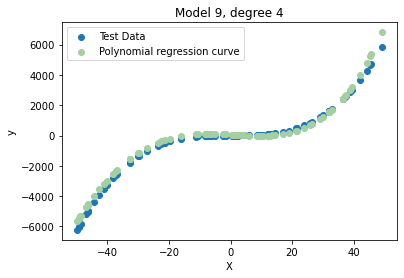

[58.571953172803, -146.44184524048845, 47.67699387148931, 52.392654834286624, -54.25488702182544, -29.475395388040255, -242.69071912374503, -43.19175548093205, 144.63514013026665]
[7141981.557670614, 8498447.21398446, 7673622.928177153, 5276153.633059924, 7998354.593784353, 6536942.077269065, 8433517.279647887, 6803290.158822345, 6241843.5304430295]


In [169]:
predict = higherdegreemodel(4, train_dataset[8][["X"]], train_dataset[8][["y"]])

plot("Model 9, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

### Model 10

Coefficient of determination (R**2):  0.9838737911913438


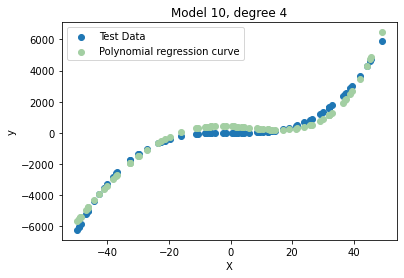

[58.571953172803, -146.44184524048845, 47.67699387148931, 52.392654834286624, -54.25488702182544, -29.475395388040255, -242.69071912374503, -43.19175548093205, 144.63514013026665, 74.39118123339014]
[7141981.557670614, 8498447.21398446, 7673622.928177153, 5276153.633059924, 7998354.593784353, 6536942.077269065, 8433517.279647887, 6803290.158822345, 6241843.5304430295, 6153639.376116125]


In [170]:
predict = higherdegreemodel(4, train_dataset[9][["X"]], train_dataset[9][["y"]])

plot("Model 10, degree 4", predict)

degree4bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree4bias)
degree4variance.append(np.var(predict))
print(degree4variance)

## Analysis

In [171]:
mean_variance = np.mean(degree4variance)
mean_bias = np.mean(degree4bias)
print("Mean variance for degree 4 function: ", mean_variance)
print("Mean bias for degree 4 function: ", mean_bias)

Mean variance for degree 4 function:  7075779.234897494
Mean bias for degree 4 function:  -13.838667901279553


## Polynomial Degree: 5

In [172]:
degree5variance = []
degree5bias = []

### Model 1

Coefficient of determination (R**2):  0.9860788970615108


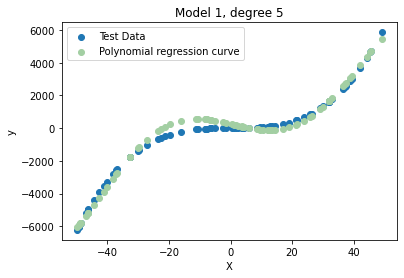

[81.5585596212263]
[6899711.986739308]


In [173]:
predict = higherdegreemodel(5, train_dataset[0][["X"]], train_dataset[0][["y"]])

plot("Model 1, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 2

Coefficient of determination (R**2):  0.9682265592274066


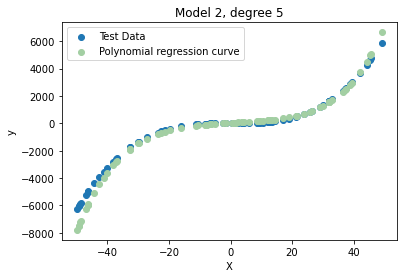

[81.5585596212263, -160.2157487469305]
[6899711.986739308, 8697671.840098932]


In [174]:
predict = higherdegreemodel(5, train_dataset[1][["X"]], train_dataset[1][["y"]])

plot("Model 2, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 3

Coefficient of determination (R**2):  0.9907035968353755


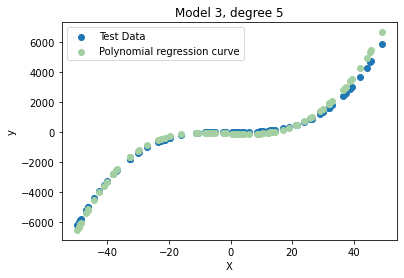

[81.5585596212263, -160.2157487469305, 50.18514200142393]
[6899711.986739308, 8697671.840098932, 7625877.2954293145]


In [175]:
predict = higherdegreemodel(5, train_dataset[2][["X"]], train_dataset[2][["y"]])

plot("Model 3, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 4

Coefficient of determination (R**2):  0.9699786374395576


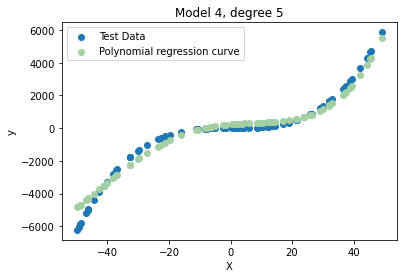

[81.5585596212263, -160.2157487469305, 50.18514200142393, 53.16250770739492]
[6899711.986739308, 8697671.840098932, 7625877.2954293145, 5262139.457728955]


In [176]:
predict = higherdegreemodel(5, train_dataset[3][["X"]], train_dataset[3][["y"]])

plot("Model 4, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 5

Coefficient of determination (R**2):  0.9696181995495097


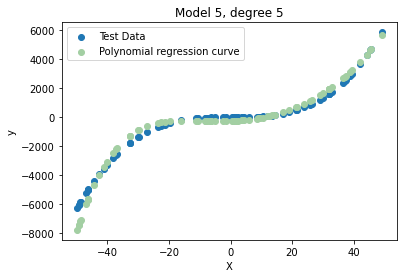

[81.5585596212263, -160.2157487469305, 50.18514200142393, 53.16250770739492, -59.58738624141371]
[6899711.986739308, 8697671.840098932, 7625877.2954293145, 5262139.457728955, 8134521.977372294]


In [177]:
predict = higherdegreemodel(5, train_dataset[4][["X"]], train_dataset[4][["y"]])

plot("Model 5, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 6

Coefficient of determination (R**2):  0.9636496491445918


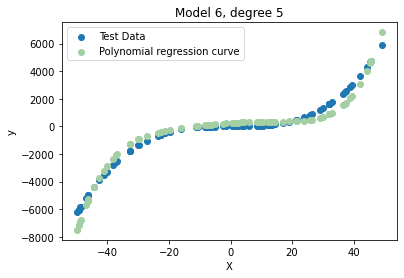

[81.5585596212263, -160.2157487469305, 50.18514200142393, 53.16250770739492, -59.58738624141371, -63.051039794219676]
[6899711.986739308, 8697671.840098932, 7625877.2954293145, 5262139.457728955, 8134521.977372294, 7042410.620736435]


In [178]:
predict = higherdegreemodel(5, train_dataset[5][["X"]], train_dataset[5][["y"]])

plot("Model 6, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 7

Coefficient of determination (R**2):  0.9595916681988119


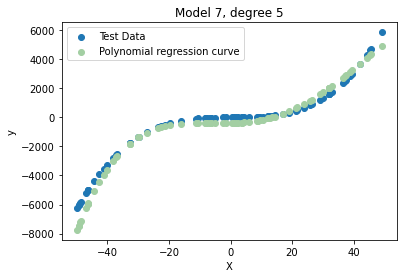

[81.5585596212263, -160.2157487469305, 50.18514200142393, 53.16250770739492, -59.58738624141371, -63.051039794219676, -240.50035859436184]
[6899711.986739308, 8697671.840098932, 7625877.2954293145, 5262139.457728955, 8134521.977372294, 7042410.620736435, 8408466.43030502]


In [179]:
predict = higherdegreemodel(5, train_dataset[6][["X"]], train_dataset[6][["y"]])

plot("Model 7, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 8

Coefficient of determination (R**2):  0.9846289181996835


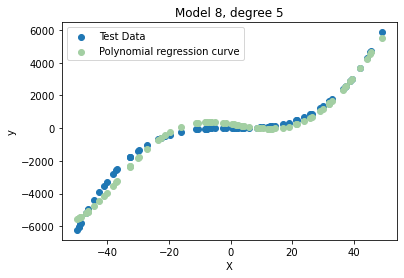

[81.5585596212263, -160.2157487469305, 50.18514200142393, 53.16250770739492, -59.58738624141371, -63.051039794219676, -240.50035859436184, -31.4845773488888]
[6899711.986739308, 8697671.840098932, 7625877.2954293145, 5262139.457728955, 8134521.977372294, 7042410.620736435, 8408466.43030502, 6641330.115371595]


In [180]:
predict = higherdegreemodel(5, train_dataset[7][["X"]], train_dataset[7][["y"]])

plot("Model 8, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 9

Coefficient of determination (R**2):  0.9887100248535253


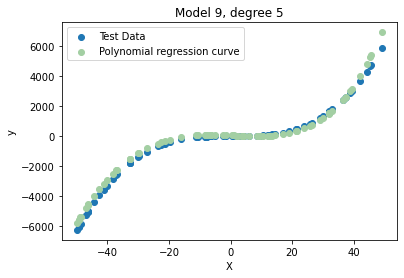

[81.5585596212263, -160.2157487469305, 50.18514200142393, 53.16250770739492, -59.58738624141371, -63.051039794219676, -240.50035859436184, -31.4845773488888, 141.2866648737979]
[6899711.986739308, 8697671.840098932, 7625877.2954293145, 5262139.457728955, 8134521.977372294, 7042410.620736435, 8408466.43030502, 6641330.115371595, 6273376.917708656]


In [181]:
predict = higherdegreemodel(5, train_dataset[8][["X"]], train_dataset[8][["y"]])

plot("Model 9, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

### Model 10

Coefficient of determination (R**2):  0.9747002474629602


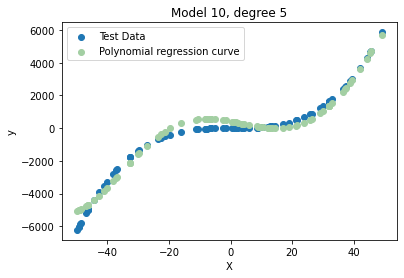

[81.5585596212263, -160.2157487469305, 50.18514200142393, 53.16250770739492, -59.58738624141371, -63.051039794219676, -240.50035859436184, -31.4845773488888, 141.2866648737979, 98.5122337469321]
[6899711.986739308, 8697671.840098932, 7625877.2954293145, 5262139.457728955, 8134521.977372294, 7042410.620736435, 8408466.43030502, 6641330.115371595, 6273376.917708656, 5976946.3588314]


In [182]:
predict = higherdegreemodel(5, train_dataset[9][["X"]], train_dataset[9][["y"]])

plot("Model 10, degree 5", predict)

degree5bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree5bias)
degree5variance.append(np.var(predict))
print(degree5variance)

## Analysis

In [183]:
mean_variance = np.mean(degree5variance)
mean_bias = np.mean(degree5bias)
print("Mean variance for degree 5 function: ", mean_variance)
print("Mean bias for degree 5 function: ", mean_bias)

Mean variance for degree 5 function:  7096245.300032191
Mean bias for degree 5 function:  -13.013400277503944


## Polynomial Degree: 6

In [184]:
degree6variance = []
degree6bias = []

### Model 1

Coefficient of determination (R**2):  0.9836505942375948


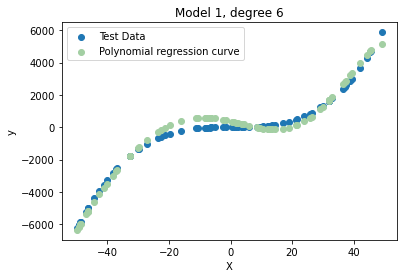

[87.22423065326879]
[7060314.44588947]


In [185]:
predict = higherdegreemodel(6, train_dataset[0][["X"]], train_dataset[0][["y"]])

plot("Model 1, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 2

Coefficient of determination (R**2):  0.9611805072265452


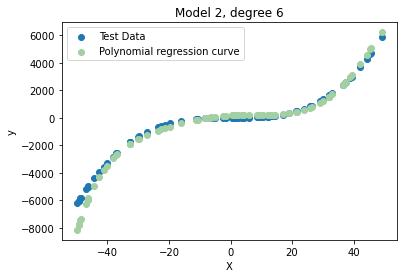

[87.22423065326879, -153.95118111270725]
[7060314.44588947, 8871320.934579661]


In [186]:
predict = higherdegreemodel(6, train_dataset[1][["X"]], train_dataset[1][["y"]])

plot("Model 2, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 3

Coefficient of determination (R**2):  0.9898670259133795


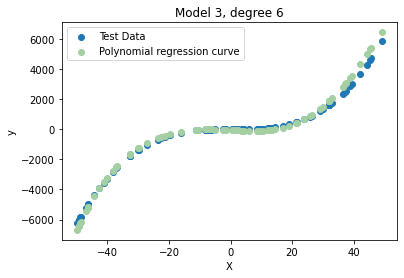

[87.22423065326879, -153.95118111270725, 48.2320622005503]
[7060314.44588947, 8871320.934579661, 7695425.032237789]


In [187]:
predict = higherdegreemodel(6, train_dataset[2][["X"]], train_dataset[2][["y"]])

plot("Model 3, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 4

Coefficient of determination (R**2):  0.9611165240814967


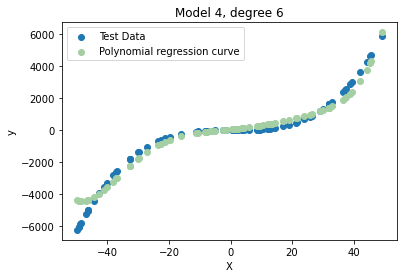

[87.22423065326879, -153.95118111270725, 48.2320622005503, 53.460934721195734]
[7060314.44588947, 8871320.934579661, 7695425.032237789, 5208950.48883798]


In [188]:
predict = higherdegreemodel(6, train_dataset[3][["X"]], train_dataset[3][["y"]])

plot("Model 4, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 5

Coefficient of determination (R**2):  0.9666133934518276


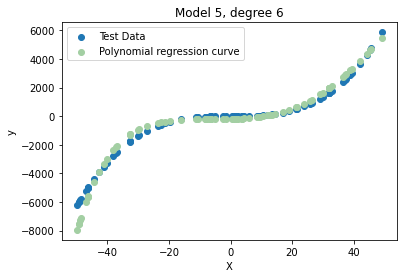

[87.22423065326879, -153.95118111270725, 48.2320622005503, 53.460934721195734, -57.18496322335242]
[7060314.44588947, 8871320.934579661, 7695425.032237789, 5208950.48883798, 8199813.507123673]


In [189]:
predict = higherdegreemodel(6, train_dataset[4][["X"]], train_dataset[4][["y"]])

plot("Model 5, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 6

Coefficient of determination (R**2):  0.966145763552393


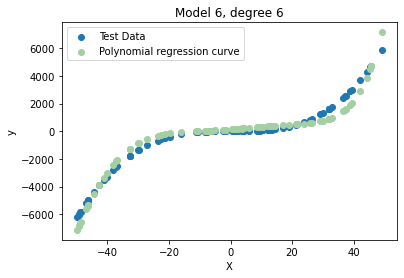

[87.22423065326879, -153.95118111270725, 48.2320622005503, 53.460934721195734, -57.18496322335242, -66.41551994717295]
[7060314.44588947, 8871320.934579661, 7695425.032237789, 5208950.48883798, 8199813.507123673, 6876424.294777049]


In [190]:
predict = higherdegreemodel(6, train_dataset[5][["X"]], train_dataset[5][["y"]])

plot("Model 6, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 7

Coefficient of determination (R**2):  0.9591658074804922


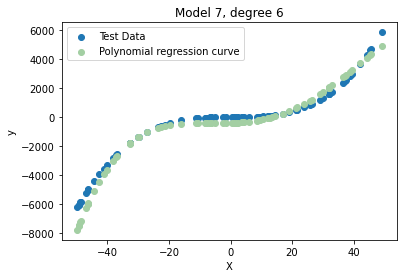

[87.22423065326879, -153.95118111270725, 48.2320622005503, 53.460934721195734, -57.18496322335242, -66.41551994717295, -240.6348205518329]
[7060314.44588947, 8871320.934579661, 7695425.032237789, 5208950.48883798, 8199813.507123673, 6876424.294777049, 8423425.529450351]


In [191]:
predict = higherdegreemodel(6, train_dataset[6][["X"]], train_dataset[6][["y"]])

plot("Model 7, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 8

Coefficient of determination (R**2):  0.97301146980395


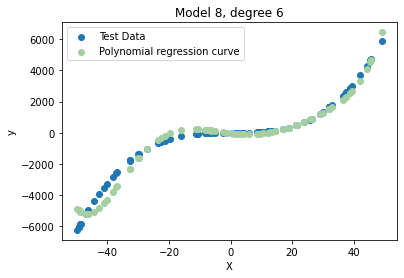

[87.22423065326879, -153.95118111270725, 48.2320622005503, 53.460934721195734, -57.18496322335242, -66.41551994717295, -240.6348205518329, -53.64253170243527]
[7060314.44588947, 8871320.934579661, 7695425.032237789, 5208950.48883798, 8199813.507123673, 6876424.294777049, 8423425.529450351, 6522661.903815444]


In [192]:
predict = higherdegreemodel(6, train_dataset[7][["X"]], train_dataset[7][["y"]])

plot("Model 8, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 9

Coefficient of determination (R**2):  0.988584172488494


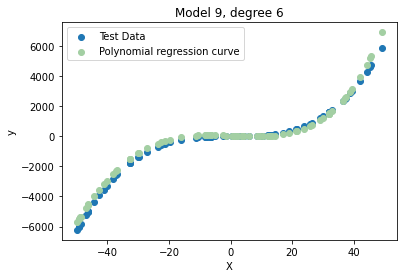

[87.22423065326879, -153.95118111270725, 48.2320622005503, 53.460934721195734, -57.18496322335242, -66.41551994717295, -240.6348205518329, -53.64253170243527, 141.319447335568]
[7060314.44588947, 8871320.934579661, 7695425.032237789, 5208950.48883798, 8199813.507123673, 6876424.294777049, 8423425.529450351, 6522661.903815444, 6264398.1386277275]


In [193]:
predict = higherdegreemodel(6, train_dataset[8][["X"]], train_dataset[8][["y"]])

plot("Model 9, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

### Model 10

Coefficient of determination (R**2):  0.9720040974946841


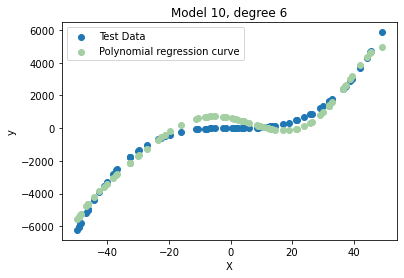

[87.22423065326879, -153.95118111270725, 48.2320622005503, 53.460934721195734, -57.18496322335242, -66.41551994717295, -240.6348205518329, -53.64253170243527, 141.319447335568, 108.60902153920767]
[7060314.44588947, 8871320.934579661, 7695425.032237789, 5208950.48883798, 8199813.507123673, 6876424.294777049, 8423425.529450351, 6522661.903815444, 6264398.1386277275, 6121378.384328738]


In [194]:
predict = higherdegreemodel(6, train_dataset[9][["X"]], train_dataset[9][["y"]])

plot("Model 10, degree 6", predict)

degree6bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree6bias)
degree6variance.append(np.var(predict))
print(degree6variance)

## Analysis

In [195]:
mean_variance = np.mean(degree6variance)
mean_bias = np.mean(degree6bias)
print("Mean variance for degree 6 function: ", mean_variance)
print("Mean bias for degree 6 function: ", mean_bias)

Mean variance for degree 6 function:  7124411.265966788
Mean bias for degree 6 function:  -13.29833200877103


## Polynomial Degree: 7

In [196]:
degree7variance = []
degree7bias = []

### Model 1

Coefficient of determination (R**2):  0.9833322636077064


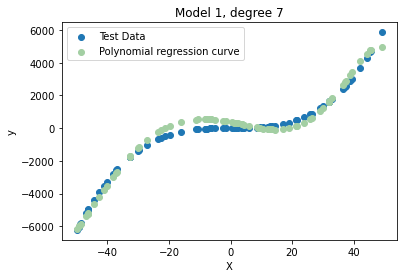

[95.27308832280332]
[6996656.267955517]


In [197]:
predict = higherdegreemodel(7, train_dataset[0][["X"]], train_dataset[0][["y"]])

plot("Model 1, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 2

Coefficient of determination (R**2):  0.9600667985276687


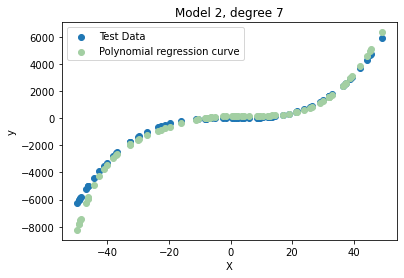

[95.27308832280332, -155.1204309523668]
[6996656.267955517, 8906356.61012886]


In [198]:
predict = higherdegreemodel(7, train_dataset[1][["X"]], train_dataset[1][["y"]])

plot("Model 2, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 3

Coefficient of determination (R**2):  0.9806056382464228


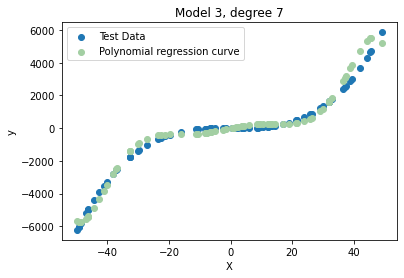

[95.27308832280332, -155.1204309523668, 75.09495381944046]
[6996656.267955517, 8906356.61012886, 7334775.572319846]


In [199]:
predict = higherdegreemodel(7, train_dataset[2][["X"]], train_dataset[2][["y"]])

plot("Model 3, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 4

Coefficient of determination (R**2):  0.9530940612831933


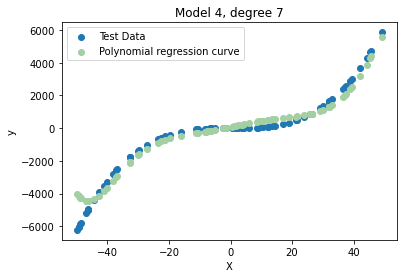

[95.27308832280332, -155.1204309523668, 75.09495381944046, 56.20303840763444]
[6996656.267955517, 8906356.61012886, 7334775.572319846, 5102913.0397314485]


In [200]:
predict = higherdegreemodel(7, train_dataset[3][["X"]], train_dataset[3][["y"]])

plot("Model 4, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 5

Coefficient of determination (R**2):  0.9686308213018235


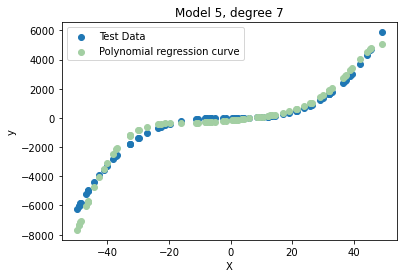

[95.27308832280332, -155.1204309523668, 75.09495381944046, 56.20303840763444, -55.19864956634317]
[6996656.267955517, 8906356.61012886, 7334775.572319846, 5102913.0397314485, 8111818.966312848]


In [201]:
predict = higherdegreemodel(7, train_dataset[4][["X"]], train_dataset[4][["y"]])

plot("Model 5, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 6

Coefficient of determination (R**2):  0.9661020266771361


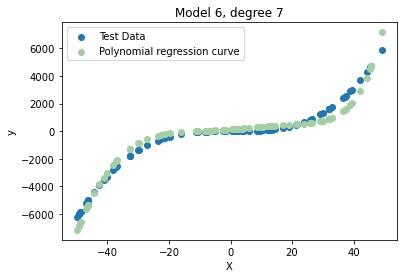

[95.27308832280332, -155.1204309523668, 75.09495381944046, 56.20303840763444, -55.19864956634317, -66.65959803194916]
[6996656.267955517, 8906356.61012886, 7334775.572319846, 5102913.0397314485, 8111818.966312848, 6879522.87769301]


In [202]:
predict = higherdegreemodel(7, train_dataset[5][["X"]], train_dataset[5][["y"]])

plot("Model 6, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 7

Coefficient of determination (R**2):  0.9626896417694205


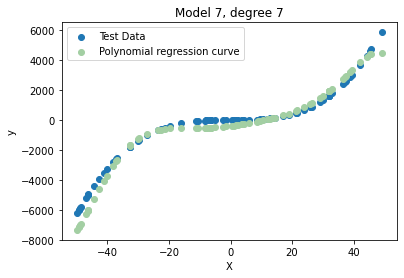

[95.27308832280332, -155.1204309523668, 75.09495381944046, 56.20303840763444, -55.19864956634317, -66.65959803194916, -230.3495199367798]
[6996656.267955517, 8906356.61012886, 7334775.572319846, 5102913.0397314485, 8111818.966312848, 6879522.87769301, 8219376.232390733]


In [203]:
predict = higherdegreemodel(7, train_dataset[6][["X"]], train_dataset[6][["y"]])

plot("Model 7, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 8

Coefficient of determination (R**2):  0.9589639819582592


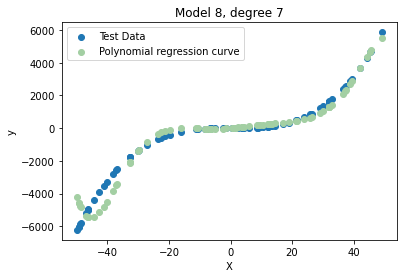

[95.27308832280332, -155.1204309523668, 75.09495381944046, 56.20303840763444, -55.19864956634317, -66.65959803194916, -230.3495199367798, -44.765267208648346]
[6996656.267955517, 8906356.61012886, 7334775.572319846, 5102913.0397314485, 8111818.966312848, 6879522.87769301, 8219376.232390733, 6424821.582753298]


In [204]:
predict = higherdegreemodel(7, train_dataset[7][["X"]], train_dataset[7][["y"]])

plot("Model 8, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 9

Coefficient of determination (R**2):  0.9819788614183832


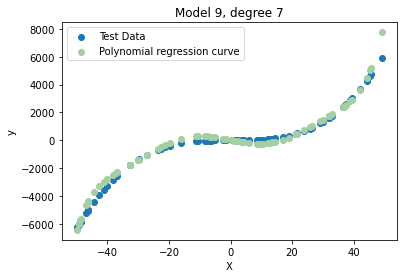

[95.27308832280332, -155.1204309523668, 75.09495381944046, 56.20303840763444, -55.19864956634317, -66.65959803194916, -230.3495199367798, -44.765267208648346, 127.6580045470071]
[6996656.267955517, 8906356.61012886, 7334775.572319846, 5102913.0397314485, 8111818.966312848, 6879522.87769301, 8219376.232390733, 6424821.582753298, 6578418.201957766]


In [205]:
predict = higherdegreemodel(7, train_dataset[8][["X"]], train_dataset[8][["y"]])

plot("Model 9, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

### Model 10

Coefficient of determination (R**2):  0.967985192152303


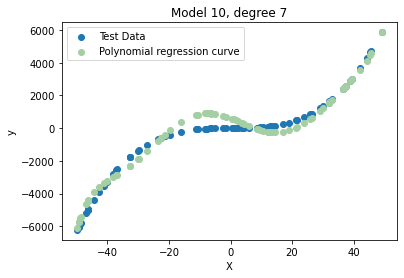

[95.27308832280332, -155.1204309523668, 75.09495381944046, 56.20303840763444, -55.19864956634317, -66.65959803194916, -230.3495199367798, -44.765267208648346, 127.6580045470071, 112.64051890658493]
[6996656.267955517, 8906356.61012886, 7334775.572319846, 5102913.0397314485, 8111818.966312848, 6879522.87769301, 8219376.232390733, 6424821.582753298, 6578418.201957766, 6345931.651726143]


In [206]:
predict = higherdegreemodel(7, train_dataset[9][["X"]], train_dataset[9][["y"]])

plot("Model 10, degree 7", predict)

degree7bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree7bias)
degree7variance.append(np.var(predict))
print(degree7variance)

## Analysis

In [207]:
mean_variance = np.mean(degree7variance)
mean_bias = np.mean(degree7bias)
print("Mean variance for degree 7 function: ", mean_variance)
print("Mean bias for degree 7 function: ", mean_bias)

Mean variance for degree 7 function:  7090059.100296946
Mean bias for degree 7 function:  -8.522386169261708


## Polynomial Degree: 8

In [208]:
degree8variance = []
degree8bias = []

### Model 1

Coefficient of determination (R**2):  0.9833666041420995


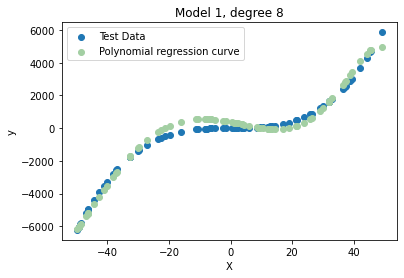

[94.34899616783022]
[7000053.598582779]


In [209]:
predict = higherdegreemodel(8, train_dataset[0][["X"]], train_dataset[0][["y"]])

plot("Model 1, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 2

Coefficient of determination (R**2):  0.9488825175267804


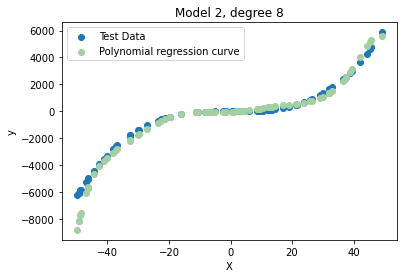

[94.34899616783022, -195.4421731717181]
[7000053.598582779, 8957792.142941598]


In [210]:
predict = higherdegreemodel(8, train_dataset[1][["X"]], train_dataset[1][["y"]])

plot("Model 2, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 3

Coefficient of determination (R**2):  0.9755158716295039


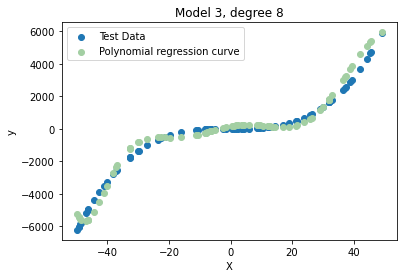

[94.34899616783022, -195.4421731717181, 103.62101934063064]
[7000053.598582779, 8957792.142941598, 7368103.607545224]


In [211]:
predict = higherdegreemodel(8, train_dataset[2][["X"]], train_dataset[2][["y"]])

plot("Model 3, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 4

Coefficient of determination (R**2):  0.9535419526908555


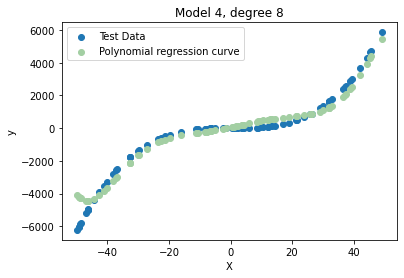

[94.34899616783022, -195.4421731717181, 103.62101934063064, 51.17867094584192]
[7000053.598582779, 8957792.142941598, 7368103.607545224, 5093605.317942776]


In [212]:
predict = higherdegreemodel(8, train_dataset[3][["X"]], train_dataset[3][["y"]])

plot("Model 4, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 5

Coefficient of determination (R**2):  0.9571278434965502


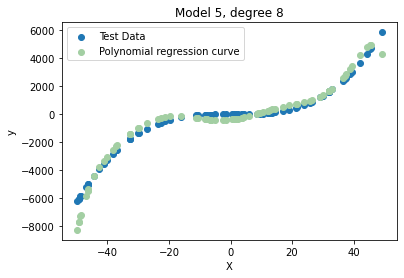

[94.34899616783022, -195.4421731717181, 103.62101934063064, 51.17867094584192, -82.05777367095072]
[7000053.598582779, 8957792.142941598, 7368103.607545224, 5093605.317942776, 8150587.731131168]


In [213]:
predict = higherdegreemodel(8, train_dataset[4][["X"]], train_dataset[4][["y"]])

plot("Model 5, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 6

Coefficient of determination (R**2):  0.9633490480132831


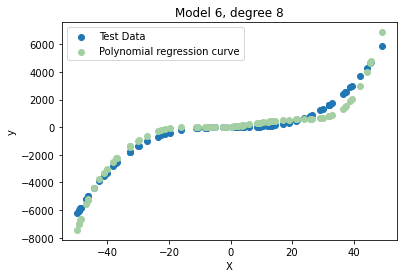

[94.34899616783022, -195.4421731717181, 103.62101934063064, 51.17867094584192, -82.05777367095072, -85.13370098863267]
[7000053.598582779, 8957792.142941598, 7368103.607545224, 5093605.317942776, 8150587.731131168, 6923441.565837416]


In [214]:
predict = higherdegreemodel(8, train_dataset[5][["X"]], train_dataset[5][["y"]])

plot("Model 6, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 7

Coefficient of determination (R**2):  0.9617401151863998


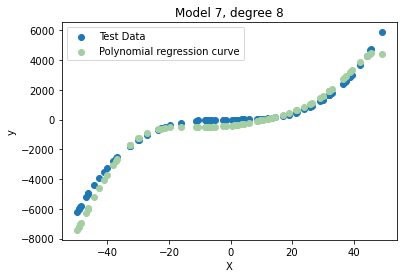

[94.34899616783022, -195.4421731717181, 103.62101934063064, 51.17867094584192, -82.05777367095072, -85.13370098863267, -235.3271351010531]
[7000053.598582779, 8957792.142941598, 7368103.607545224, 5093605.317942776, 8150587.731131168, 6923441.565837416, 8234637.676856083]


In [215]:
predict = higherdegreemodel(8, train_dataset[6][["X"]], train_dataset[6][["y"]])

plot("Model 7, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 8

Coefficient of determination (R**2):  0.9559981784998945


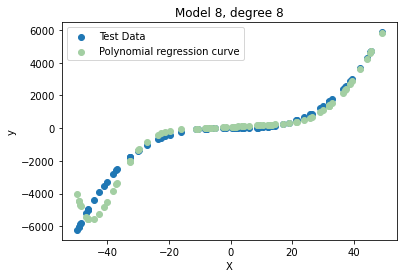

[94.34899616783022, -195.4421731717181, 103.62101934063064, 51.17867094584192, -82.05777367095072, -85.13370098863267, -235.3271351010531, -31.355192430269938]
[7000053.598582779, 8957792.142941598, 7368103.607545224, 5093605.317942776, 8150587.731131168, 6923441.565837416, 8234637.676856083, 6470419.5357193705]


In [216]:
predict = higherdegreemodel(8, train_dataset[7][["X"]], train_dataset[7][["y"]])

plot("Model 8, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 9

Coefficient of determination (R**2):  0.982239073925445


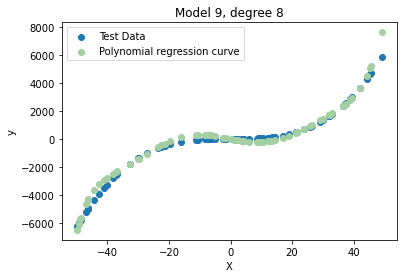

[94.34899616783022, -195.4421731717181, 103.62101934063064, 51.17867094584192, -82.05777367095072, -85.13370098863267, -235.3271351010531, -31.355192430269938, 121.6528587949322]
[7000053.598582779, 8957792.142941598, 7368103.607545224, 5093605.317942776, 8150587.731131168, 6923441.565837416, 8234637.676856083, 6470419.5357193705, 6586844.670903147]


In [217]:
predict = higherdegreemodel(8, train_dataset[8][["X"]], train_dataset[8][["y"]])

plot("Model 9, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

### Model 10

Coefficient of determination (R**2):  0.966484851656382


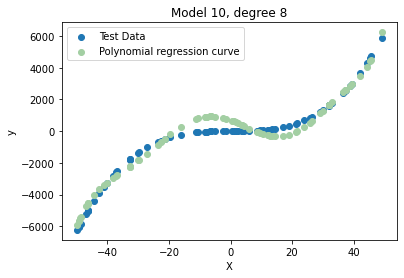

[94.34899616783022, -195.4421731717181, 103.62101934063064, 51.17867094584192, -82.05777367095072, -85.13370098863267, -235.3271351010531, -31.355192430269938, 121.6528587949322, 127.29777561695559]
[7000053.598582779, 8957792.142941598, 7368103.607545224, 5093605.317942776, 8150587.731131168, 6923441.565837416, 8234637.676856083, 6470419.5357193705, 6586844.670903147, 6393742.658094297]


In [218]:
predict = higherdegreemodel(8, train_dataset[9][["X"]], train_dataset[9][["y"]])

plot("Model 10, degree 8", predict)

degree8bias.append((predict - test[["y"]]).y.mean(axis=0))
print(degree8bias)
degree8variance.append(np.var(predict))
print(degree8variance)

## Analysis

In [219]:
mean_variance = np.mean(degree7variance)
mean_bias = np.mean(degree7bias)
print("Mean variance for degree 7 function: ", mean_variance)
print("Mean bias for degree 7 function: ", mean_bias)

Mean variance for degree 7 function:  7090059.100296946
Mean bias for degree 7 function:  -8.522386169261708


## Polynomial Degree: 9